# Import

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

# Circuits

In [11]:
circuits = pd.read_csv('Datasets/circuits.csv', encoding="ISO-8859-1")

# Qualifying

In [12]:
qualifying = pd.read_csv('Datasets/qualifying.csv', encoding = "ISO-8859-1")

# Races

In [13]:
races = pd.read_csv('Datasets/races.csv', encoding = "ISO-8859-1")

# Pre-processing Dataframes

In [14]:
# Joining QUALIFYING, RACES and CIRCUITS
combined1 = pd.merge(qualifying, races, how="left", on="raceId")
combined = pd.merge(combined1, circuits, how="left", on="circuitId")

In [15]:
# Extract the columns needed.
filtered = combined[[ "year","location", "q3"]]

In [16]:
# Drop NaN rows
filtered = filtered.dropna()

In [17]:
# Group the data into locations and years.
grouped = filtered.groupby(['location', pd.Grouper(key='year')]).min()
# Transform data from DataFrame to list.
locations = []
for (location, year) in grouped['q3'].index:
    if location not in locations:
        locations.append(location)

# Plot

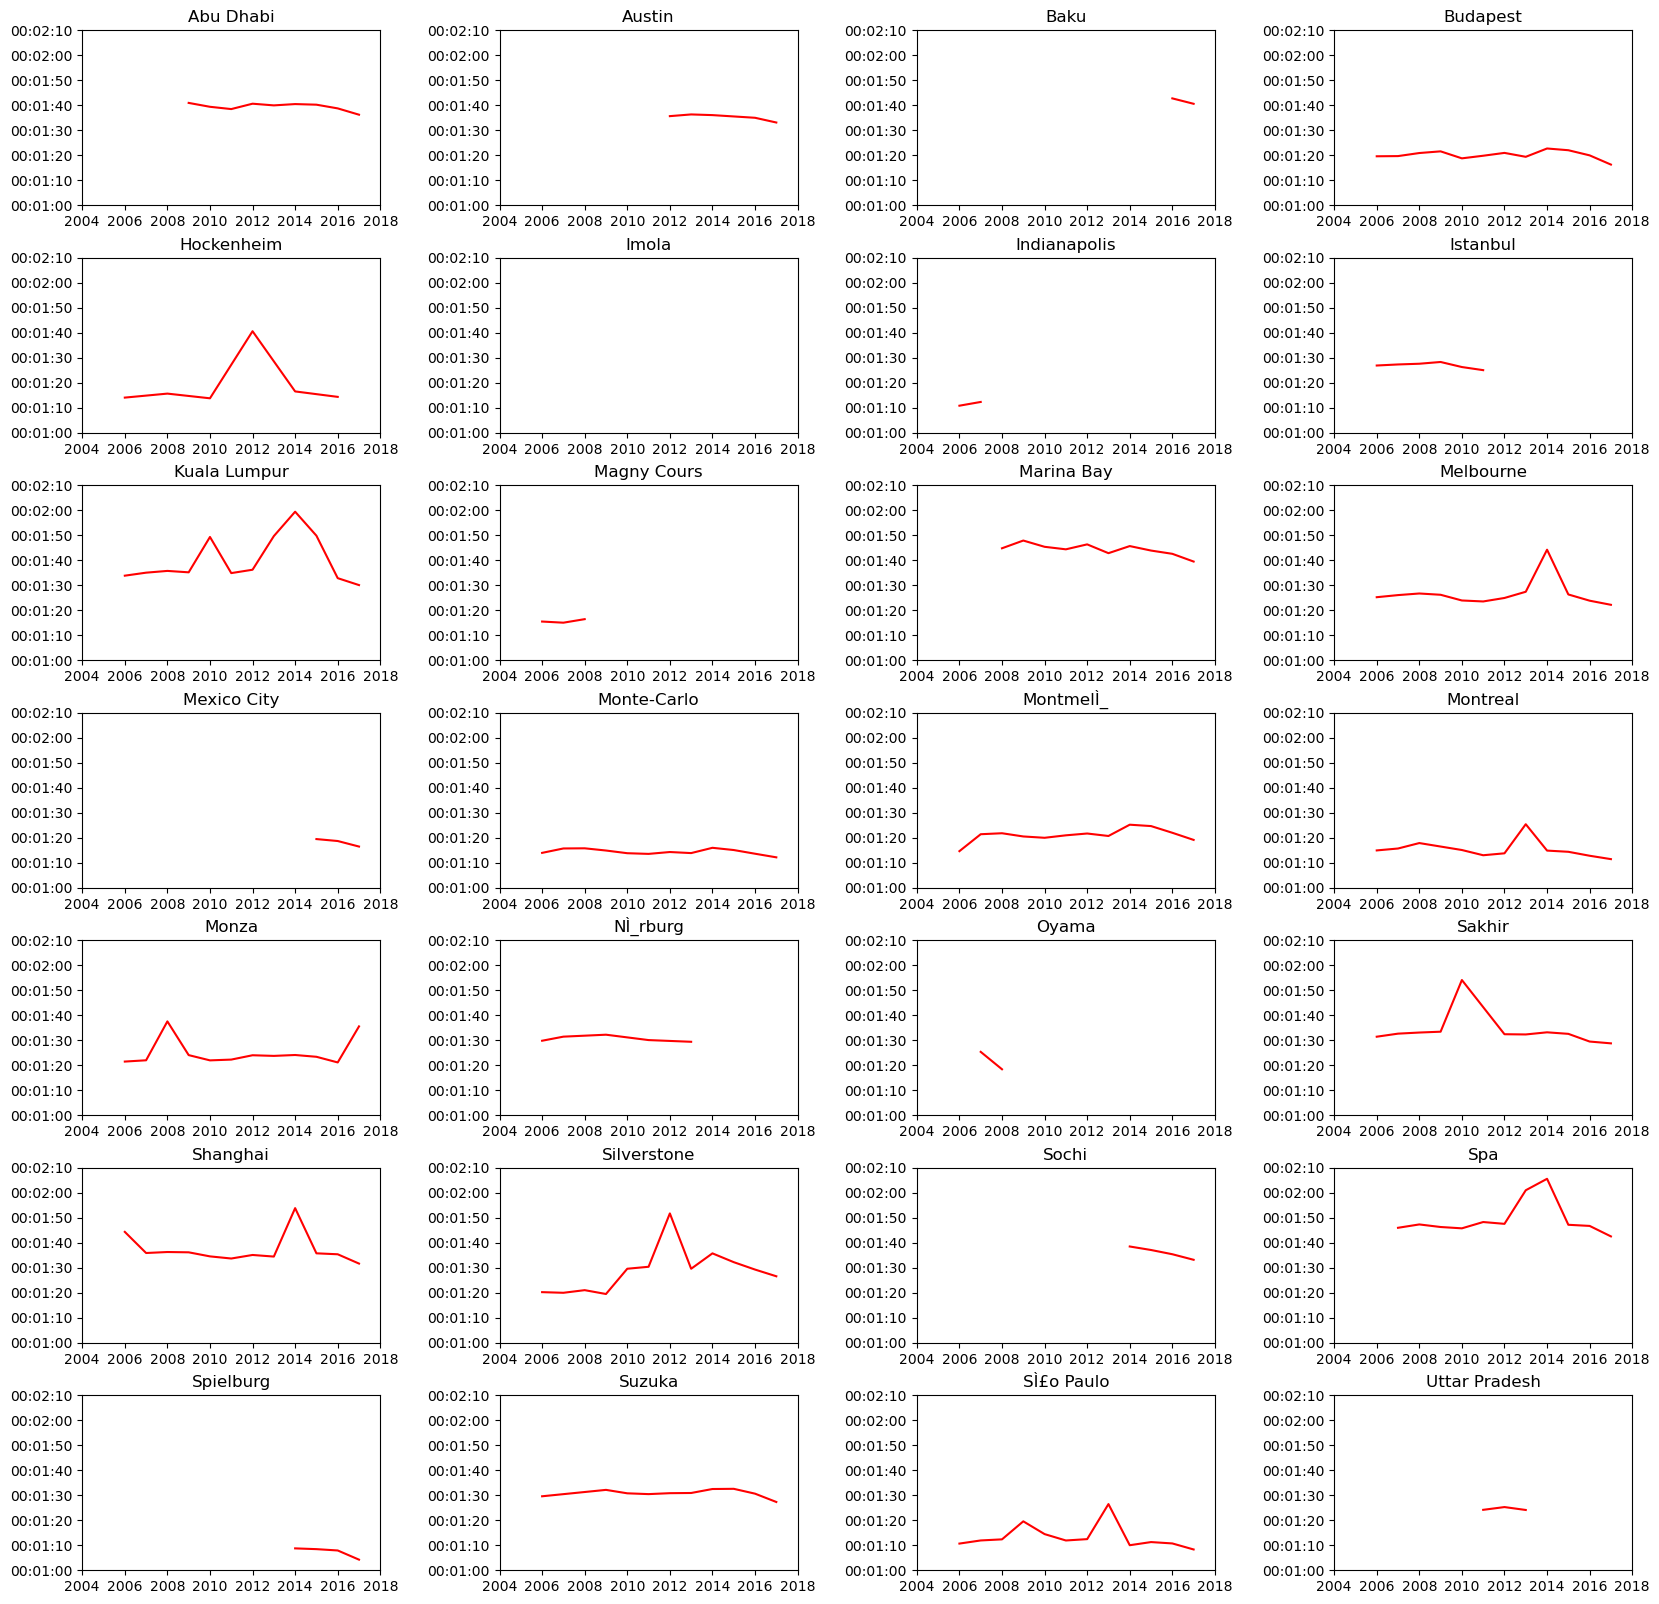

In [18]:
# The plot will have 4 columns.
ncol = 4
nrow = len(locations) // ncol + (len(locations) % 2 > 0)

# Set up figure properties and plot.
fig, axes = plt.subplots(nrows = nrow, ncols = ncol)
fig.set_figheight(20)
fig.set_figwidth(20)
fig.subplots_adjust(wspace=0.4, hspace=0.3)

for i in range(len(locations) // 4):
    for j in range(4):
        location = locations[i*4+j]
        x = []
        y = []

        for (location2, year) in grouped['q3'].index:
            if (location2 == location):
                x.append(year)
                y.append(datetime.strptime(grouped['q3'][(location2, year)], '%M:%S.%f')) 

        axes[i][j].plot(x, y, 'r')
        axes[i][j].set_title(location)
        axes[i][j].set_xlim(2004, 2018)
        axes[i][j].set_ylim(datetime(year=1900, month=1, day=1, minute=1), datetime(year=1900, month=1, day=1, minute=2, second=10))
    
plt.show()

# Analysis Background

### 2007 TMD Banned
### 2009 KERS Introduced